In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Installing Necessary Libraries**

In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn

### **Importing All The Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

### **Load the dataset**

In [4]:
file_path = '/content/drive/MyDrive/Twitter_Data.csv'
df = pd.read_csv(file_path)
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


### **Check For Null Values & Remove it**

In [5]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [6]:
df.dropna(inplace=True)


In [7]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

### **Preprocess The Text Data**

In [8]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)

### **Convert Text Data Into TF-IDF Features**

In [9]:
X = tfidf.fit_transform(df['clean_text'])
y = df['category']

### **Split The Data Into Training & Test Sets**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Train A Logistic Regression Model**

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### **Save The Model**

In [12]:
joblib.dump(model, '/content/drive/MyDrive/twitteranalysis/sentiment_model.pkl')
joblib.dump(tfidf, '/content/drive/MyDrive/twitteranalysis/tfidf_vectorizer.pkl')

['/content/drive/MyDrive/twitteranalysis/tfidf_vectorizer.pkl']

### **Evaluate The Model**

In [13]:
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8557710007976929
              precision    recall  f1-score   support

        -1.0       0.86      0.74      0.80      7152
         0.0       0.81      0.95      0.87     11067
         1.0       0.90      0.84      0.87     14375

    accuracy                           0.86     32594
   macro avg       0.86      0.84      0.85     32594
weighted avg       0.86      0.86      0.85     32594



### **Confusion Matrix**

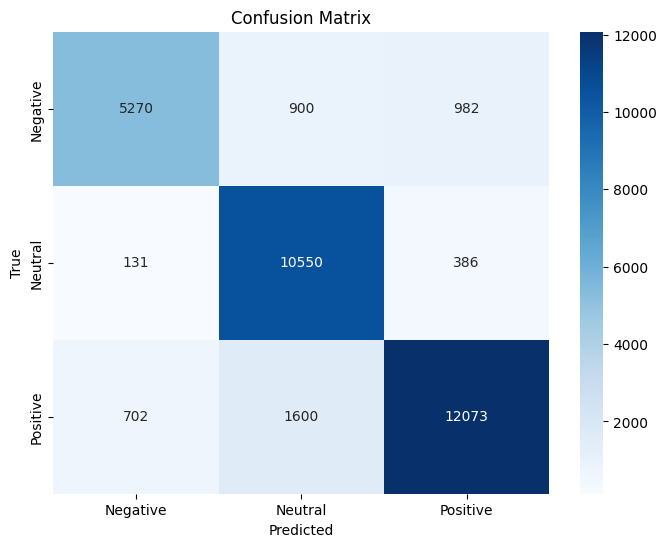

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Distribution Of Sentiments**

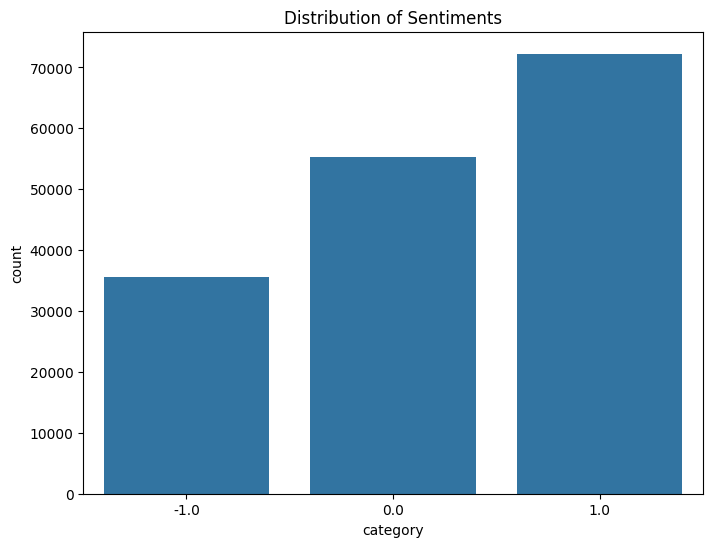

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Sentiments')
plt.show()

### **Testing The Model**

In [17]:
def predict_sentiment(new_tweets):
    X_new = tfidf.transform(new_tweets)
    predictions = model.predict(X_new)
    return predictions

new_tweets = [
    "I love this! It's amazing.",
    "I hate this. It's the worst!",
    "It's okay, nothing special."
]

predictions = predict_sentiment(new_tweets)

results_df = pd.DataFrame({'Tweet': new_tweets, 'Sentiment': predictions})
results_df['Sentiment'] = results_df['Sentiment'].map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})

print(results_df)

                          Tweet Sentiment
0    I love this! It's amazing.  Positive
1  I hate this. It's the worst!  Negative
2   It's okay, nothing special.  Positive


### **Debugging**

In [18]:
def predict_sentiment_debug(new_tweets):
    X_new = tfidf.transform(new_tweets)

    print("TF-IDF feature names:", tfidf.get_feature_names_out())
    print("TF-IDF vector shape:", X_new.shape)
    print("TF-IDF vectors:", X_new.toarray())

    predictions = model.predict(X_new)

    prediction_probs = model.predict_proba(X_new)
    print("Prediction probabilities:", prediction_probs)

    return predictions

predictions_debug = predict_sentiment_debug(new_tweets)

results_df_debug = pd.DataFrame({'Tweet': new_tweets, 'Sentiment': predictions_debug})
results_df_debug['Sentiment'] = results_df_debug['Sentiment'].map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})

print(results_df_debug)


TF-IDF feature names: ['000' '0000' '00000' ... 'வலம' 'ಬಳಸ' 'ಮನದ']
TF-IDF vector shape: (3, 39649)
TF-IDF vectors: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Prediction probabilities: [[2.67298813e-06 2.05838684e-06 9.99995269e-01]
 [9.99999982e-01 1.81013888e-08 1.03307443e-10]
 [4.87064725e-05 1.62903760e-05 9.99935003e-01]]
                          Tweet Sentiment
0    I love this! It's amazing.  Positive
1  I hate this. It's the worst!  Negative
2   It's okay, nothing special.  Positive


In [20]:
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def predict_sentiment(new_tweets):
    new_tweets = [preprocess_text(tweet) for tweet in new_tweets]

    X_new = tfidf.transform(new_tweets)

    predictions = model.predict(X_new)

    return predictions

new_tweets = [
    "I love this! It's amazing.",
    "I hate this. It's the worst!",
    "It's okay, nothing special."
]

predictions = predict_sentiment(new_tweets)

results_df = pd.DataFrame({'Tweet': new_tweets, 'Sentiment': predictions})
results_df['Sentiment'] = results_df['Sentiment'].map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})

print(results_df)

                          Tweet Sentiment
0    I love this! It's amazing.  Positive
1  I hate this. It's the worst!  Negative
2   It's okay, nothing special.  Positive
